In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
num_rows_to_read = 43050  # Replace this with the desired number of rows
data = pd.read_csv(r"train.csv", nrows=num_rows_to_read,)

In [3]:
data.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


# Tìm hiểu dữ liệu

In [4]:
data['Class Index'].unique()

array([3, 4, 2, 1], dtype=int64)

In [5]:
data.shape

(43050, 3)

In [6]:
data.dtypes

Class Index     int64
Title          object
Description    object
dtype: object

# Kiểm tra giá trị NULL

In [7]:
data.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

# Kiểm tra cột Class Index

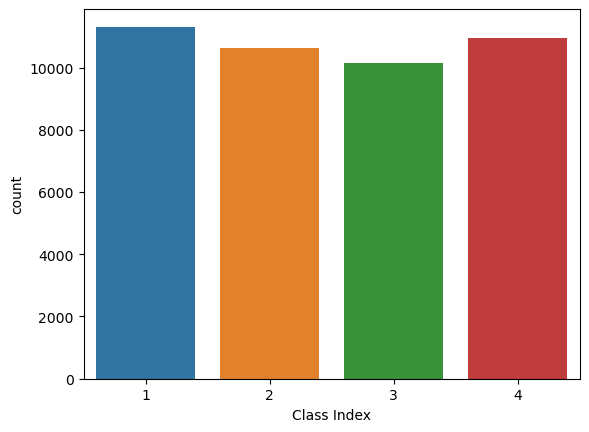

In [8]:
sns.countplot(x = 'Class Index', data = data)
plt.show()

In [9]:
data['News_length'] = data['Description'].str.len()
print(data['News_length'])

0         94
1        214
2        184
3        195
4        160
        ... 
43045    282
43046    262
43047    136
43048    166
43049    209
Name: News_length, Length: 43050, dtype: int64


# Kiểm tra độ đài của dữ liệu

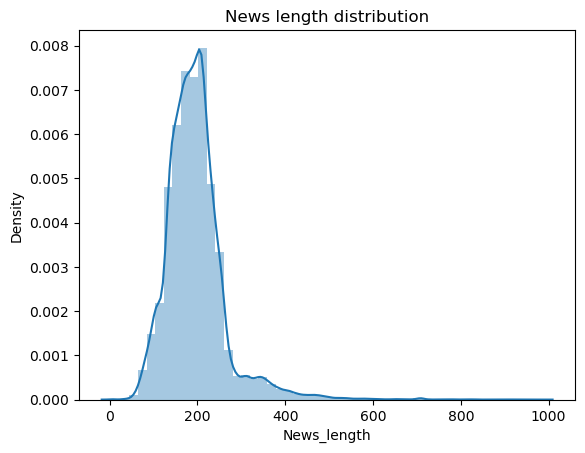

In [10]:
sns.distplot(data['News_length']).set_title('News length distribution');


# WordCloud

In [11]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

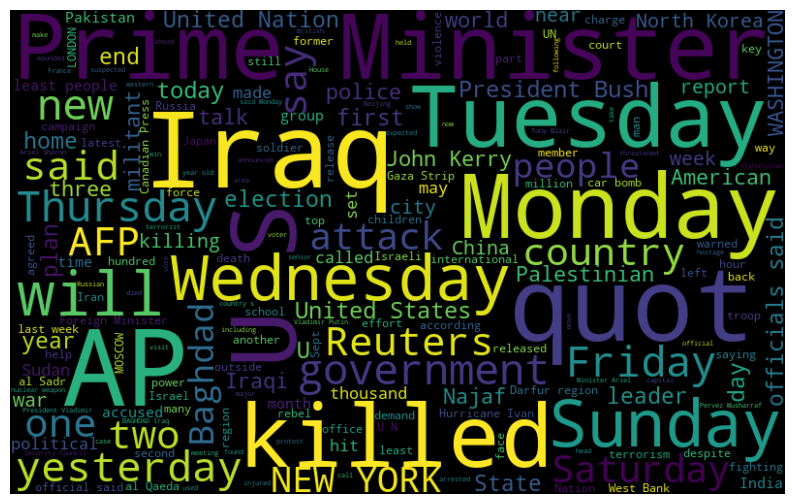

In [12]:
# 1-4 where 1-World, 2-Sports, 3-Business, 4-Sci/Tech
subset=data[data['Class Index'] == 1]
text=subset.Description.values
words =" ".join(text)
create_wordcloud(words)

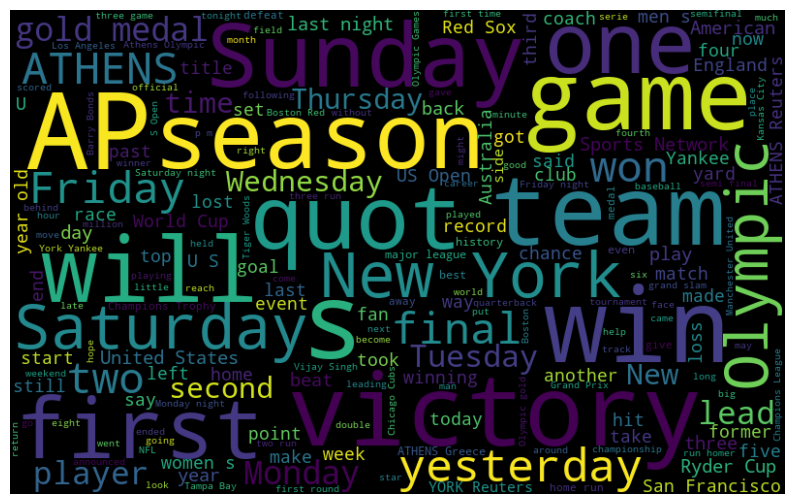

In [13]:
# 2-Sports
subset=data[data['Class Index'] == 2]
text=subset.Description.values
words =" ".join(text)
create_wordcloud(words)

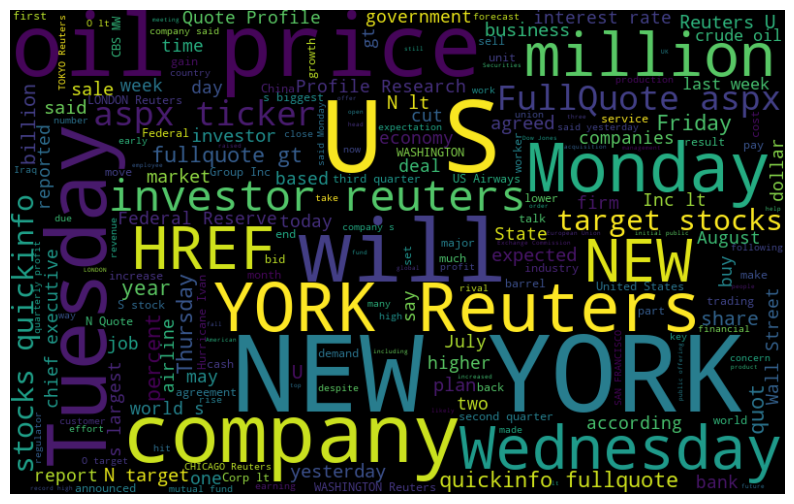

In [14]:
#3-Business, 
subset=data[data['Class Index'] == 3]
text=subset.Description.values
words =" ".join(text)
create_wordcloud(words)

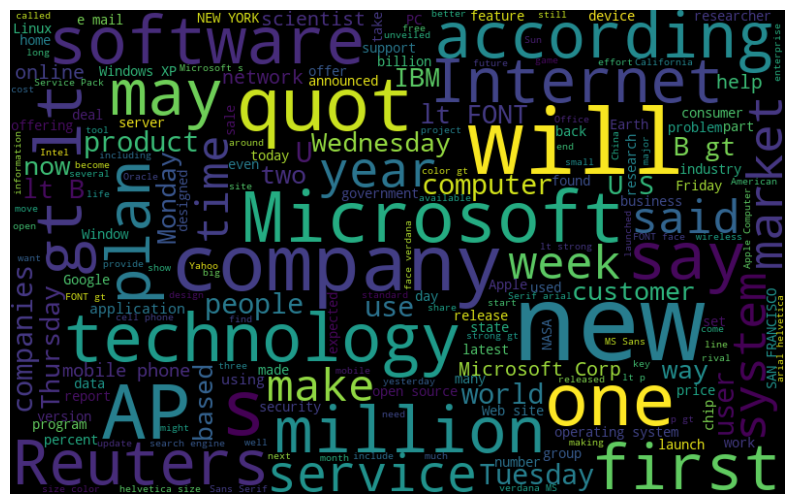

In [15]:
#4-Sci/Tech
subset=data[data['Class Index'] == 4]
text=subset.Description.values
words =" ".join(text)
create_wordcloud(words)

# Tiền xử lý dữ liệu

In [16]:
def to_lowercase(text):
    return text.lower()
  

def remove_newlines_and_extra_whitespace(text):
    text = text.replace('\n', ' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text)
    return text
#Hàm remove_newlines_and_extra_whitespace nhận một chuỗi làm đầu vào và loại bỏ các dấu xuống dòng và khoảng trắng thừa trong chuỗi đó.


def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def tokenize(text):
    return word_tokenize(text)

def remove_stopwords_and_numbers(tokens):
    stop_words = set(stopwords.words('english'))
    return [w for w in tokens if not any(char.isdigit() for char in w) and w not in stop_words]

def stem_words(tokens):
    ps = PorterStemmer()
    return [ps.stem(w) for w in tokens]

def join_tokens(tokens):
    return ' '.join(tokens)

def process_text(text):
    text = to_lowercase(text)
    text = remove_newlines_and_extra_whitespace(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    tokens = tokenize(text)
    tokens = remove_stopwords_and_numbers(tokens)
    tokens = stem_words(tokens)
    processed_text = join_tokens(tokens)
    return processed_text

In [17]:
data['Text_parsed'] = data['Description'].apply(process_text)


In [18]:
data.head()

,Class Index,Title,Description,News_length,Text_parsed
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",94,reuter shortsel wall street dwindlingband ultr...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,214,reuter privat invest firm carlyl groupwhich re...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,184,reuter soar crude price plu worriesabout econo...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,195,reuter author halt oil exportflow main pipelin...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",160,afp tearaway world oil price toppl record stra...


In [19]:
data.to_csv('BBC_News_processed.csv')

# Tách dữ liệu 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                    data['Class Index'], 
                                                    test_size=0.2, 
                                                    random_state=8)

 # Biểu diễn văn bản

In [21]:
tfidf = TfidfVectorizer()
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)





[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8610, 32835)


# Xây dựng mô hình

#  Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo mô hình Naive Bayes
model = MultinomialNB()

# Huấn luyện mô hình
model.fit(features_train, labels_train)

# Dự đoán
model_predictions = model.predict(features_test)

# Đánh giá hiệu suất
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.8910569105691057
              precision    recall  f1-score   support

           1       0.90      0.88      0.89      2275
           2       0.92      0.97      0.95      2084
           3       0.85      0.85      0.85      1988
           4       0.89      0.87      0.88      2263

    accuracy                           0.89      8610
   macro avg       0.89      0.89      0.89      8610
weighted avg       0.89      0.89      0.89      8610



## Dự đoán

In [23]:
# Xử lý văn bản mới0
text = "In an unpredictable 70-lap race that featured four changes of lead and two Safety Car periods triggered by crashes, Verstappen impressively returned to winning ways a fortnight after Red Bull's miserable Monaco for his sixth win of the season to re-establish a more comfortable world-championship lead, of 56 points."
processed_text = process_text(text)  # Xử lý văn bản

# Chuyển đổi văn bản đã xử lý thành vectơ đặc trưng
new_text_features = tfidf.transform([processed_text]).toarray()

# Dự đoán loại của tin tức mới
predicted_class = model.predict(new_text_features)[0]

predicted_class_label = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}[predicted_class]
print("Predicted class:", predicted_class_label)



Predicted class: Sports
